# Example with CIFAR10

Here is an example of how to use the tool to export CIFAR10 dataset.

To easily get dataset samples, I access it using [`torchvision`](https://github.com/pytorch/vision/), but it is not necessary. One can use other sources and adapt wrapper functions to get working this examples.

In [1]:
from torchvision.datasets import CIFAR10

cifar10_root = "/cifar10_data"
ds = CIFAR10(root=cifar10_root)

In [2]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
class_id_map = {
    0: 'airplane', 
    1: 'automobile',
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship',
    9: 'truck'
}

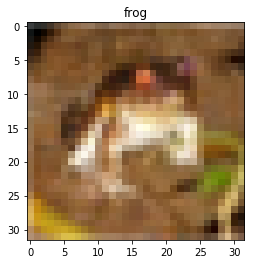

In [4]:
x, y = ds[0]
plt.imshow(x)
plt.title(class_id_map[y]);

Let's import the package and setup the dataset exporter

In [5]:
from pathlib import Path
import sys

root_path = Path("..").absolute()
if root_path.as_posix() not in sys.path:
    sys.path.append(root_path.as_posix())

from image_dataset_viz import DatasetExporter

Let's write custom functions to provide RGB 8-bits image and the label string from the dataset:

In [6]:
def read_img(i):
    return ds[i][0]


def read_label(i):
    return class_id_map[ds[i][1]]

Let's define dataset exporter and test a single sample export:

In [7]:
de = DatasetExporter(read_img_fn=read_img, read_target_fn=read_label, 
                     img_id_fn=lambda i: str(i),
                     max_output_img_size=(32, 32), 
                     n_cols=100, text_size=8)

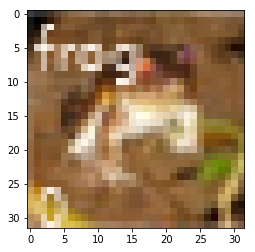

In [8]:
de.export_datapoint(0, 0, 'test.png')
plt.imshow(Image.open('test.png'))

Now let's export the whole dataset:

In [9]:
img_indices = list(range(len(ds)))
label_indices = list(range(len(ds)))

In [10]:
de.export(img_indices, label_indices, output_folder="dataset_viz")

100%|##########|50000/50000[00:30<00:00,1651.27it/s]


In [11]:
!ls -R dataset_viz/ | wc -l

11


In [12]:
out_img = Image.open("dataset_viz/dataset_part_0.png")
out_img.size

(3700, 1850)

Complete image looks like this

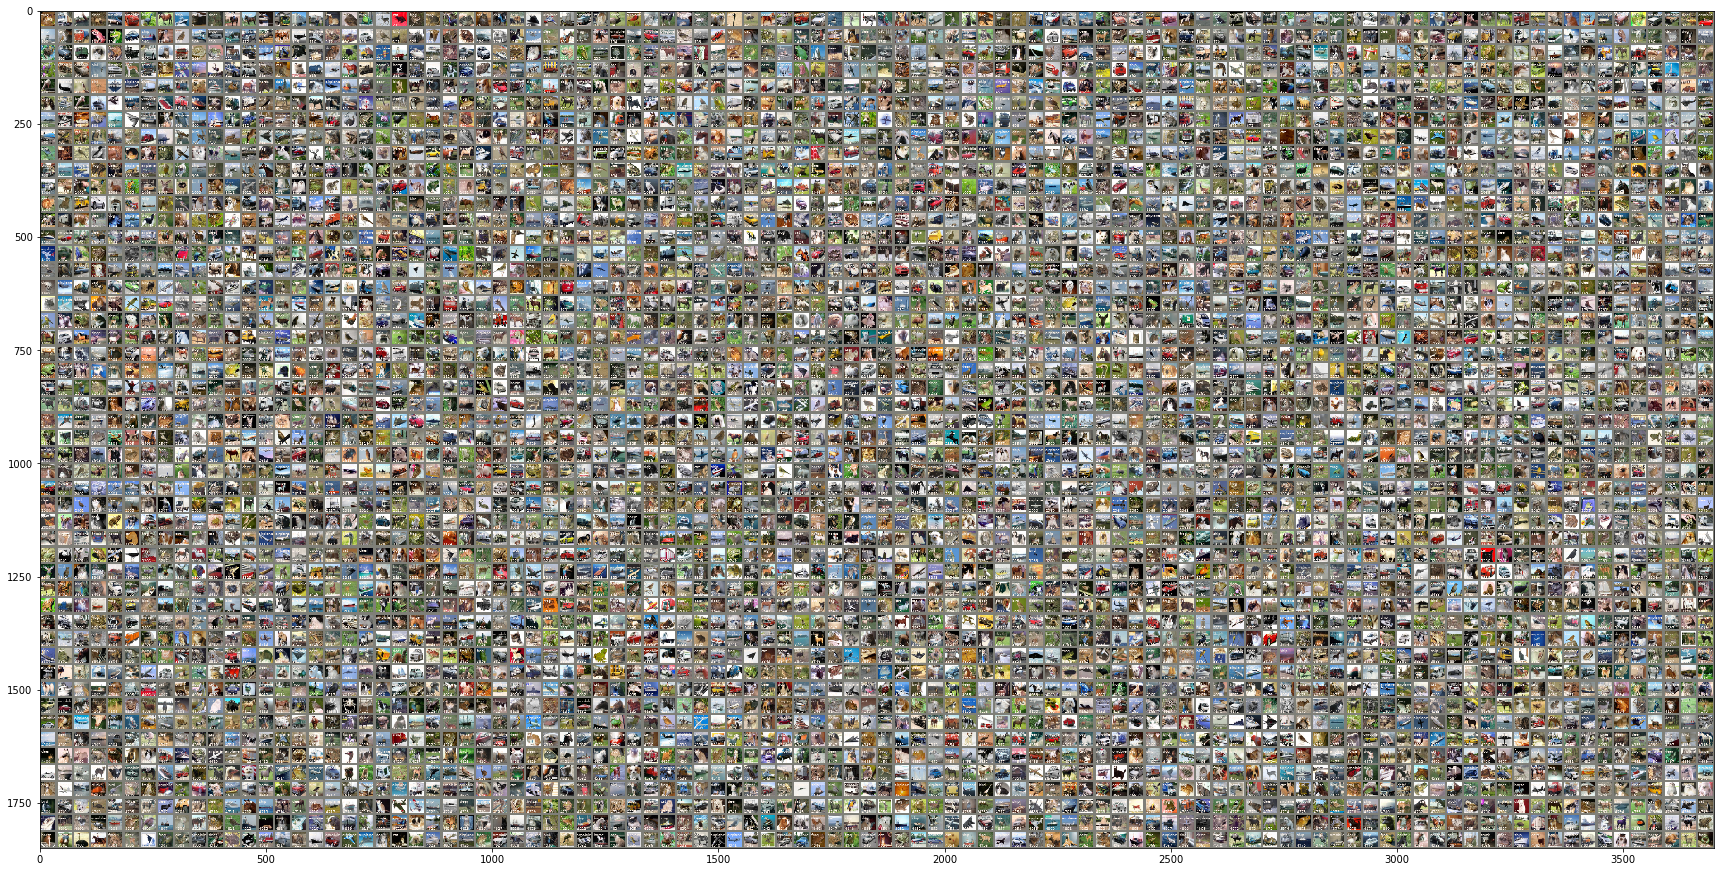

In [13]:
plt.figure(figsize=(30, 30))
plt.imshow(out_img)

**However using a modern viewer we can zoom to samples.**

Let's zoom with PIL

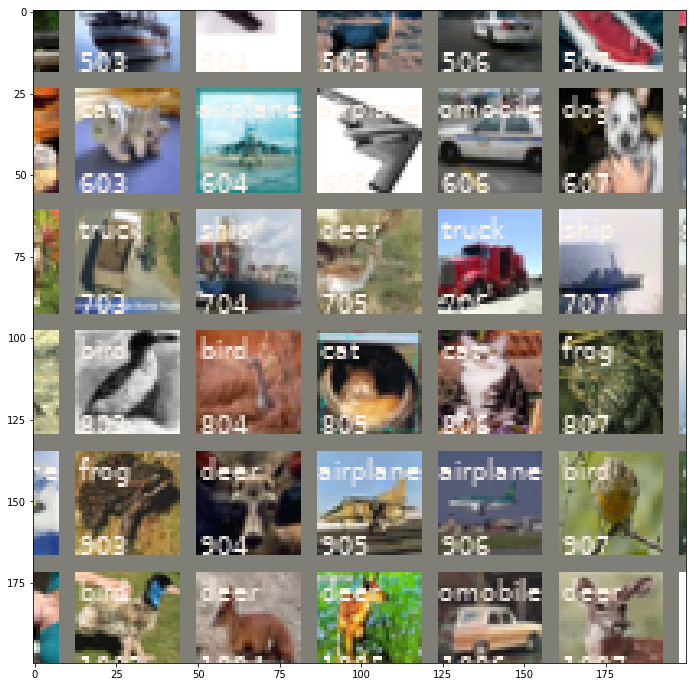

In [14]:
img = out_img.crop((100, 200, 300, 400))
plt.figure(figsize=(12, 12))
plt.imshow(img)

In [15]:
!rm -R dataset_viz/
!rm test.png